In [2497]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2498]:
data = pd.read_csv('abalone.data', header = None)

In [2499]:
data.columns = ['Sex (M, F, and I-infant)', 'Length of Shell-mm (longest)',
                'Diameter-mm (perpendicular to longest)', 'Height-mm (shell with meat)',
                'Whole-g (entire specimen)', 'Shucked-g (meat)',
                'Viscera-g (gut after bleeding)', 'Shell-g (dry)',
                'Rings Count']

In [2500]:
data.head()

,"Sex (M, F, and I-infant)",Length of Shell-mm (longest),Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Whole-g (entire specimen),Shucked-g (meat),Viscera-g (gut after bleeding),Shell-g (dry),Rings Count
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2501]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sex (M, F, and I-infant)                4177 non-null   object 
 1   Length of Shell-mm (longest)            4177 non-null   float64
 2   Diameter-mm (perpendicular to longest)  4177 non-null   float64
 3   Height-mm (shell with meat)             4177 non-null   float64
 4   Whole-g (entire specimen)               4177 non-null   float64
 5   Shucked-g (meat)                        4177 non-null   float64
 6   Viscera-g (gut after bleeding)          4177 non-null   float64
 7   Shell-g (dry)                           4177 non-null   float64
 8   Rings Count                             4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [2502]:
data.iloc[:,0].unique()

array(['M', 'F', 'I'], dtype=object)

In [2503]:
data.isnull().sum()

Sex (M, F, and I-infant)                  0
Length of Shell-mm (longest)              0
Diameter-mm (perpendicular to longest)    0
Height-mm (shell with meat)               0
Whole-g (entire specimen)                 0
Shucked-g (meat)                          0
Viscera-g (gut after bleeding)            0
Shell-g (dry)                             0
Rings Count                               0
dtype: int64

&nbsp;

Age in years is determined by adding 1.5 to the rings count.  So let's look at the connection between that number and the specimen being designated as an infant rather than male or female.

&nbsp;

In [2504]:
sex = 'Sex (M, F, and I-infant)'

Text(0.5, 0, 'M')

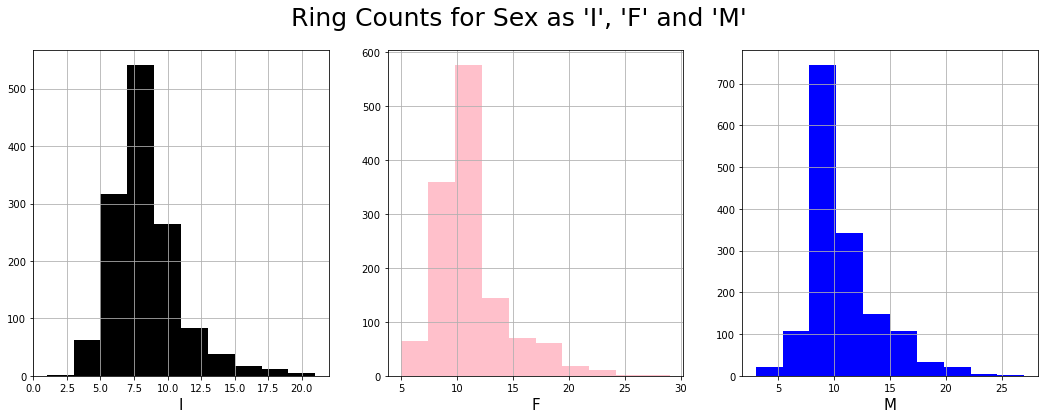

In [2505]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
fig.suptitle("Ring Counts for Sex as 'I', 'F' and 'M'", fontsize=25)
data[data[sex]=='I']['Rings Count'].hist(ax = axis[0], color='black')
axis[0].set_xlabel("I", fontsize=15)
data[data[sex]=='F']['Rings Count'].hist(ax = axis[1], color='pink')
axis[1].set_xlabel("F", fontsize=15)
data[data[sex]=='M']['Rings Count'].hist(ax = axis[2], color='blue')
axis[2].set_xlabel("M", fontsize=15)

&nbsp;

Ring counts bare little or no relationship to the specimen being tabulated as 'I' (for infant), so let's use 'unknown' in its place.  Also, making the sex a categorical variable is desirable.

&nbsp;

In [2506]:
data.loc[data[sex]=='I', sex] = 'unknown'

In [2507]:
data.iloc[:,0] = pd.Categorical(data.iloc[:,0])

In [2508]:
data.rename(columns = {sex:'Sex (M, F, and unknown)'}, inplace = True) 

In [2509]:
sex = 'Sex (M, F, and unknown)'

In [2510]:
data.columns

Index(['Sex (M, F, and unknown)', 'Length of Shell-mm (longest)',
       'Diameter-mm (perpendicular to longest)', 'Height-mm (shell with meat)',
       'Whole-g (entire specimen)', 'Shucked-g (meat)',
       'Viscera-g (gut after bleeding)', 'Shell-g (dry)', 'Rings Count'],
      dtype='object')

In [2511]:
data[sex].unique()

['M', 'F', 'unknown']
Categories (3, object): ['M', 'F', 'unknown']

<br>
<br>
<br>

Sanity checks for this dataframe should look at:

1) The ratio of each measurement to the rings count.<br>
2) Measurements in 'mm' taken as a group.<br>
3) Measurements in 'g' taken as a group.<br>

In the latter two, certain numerical relationships should arise from a simple reading of column labels.

&nbsp;

To establish a general growth profile, let's divide each measurement by it's corresponding ring count, generate an array of histograms and plot the result.
<br>
<br>
<br>
<br>

In [2512]:
lengthR   =  data.iloc[:,1]/data['Rings Count']
diameterR =  data.iloc[:,2]/data['Rings Count']
heightR   =  data.iloc[:,3]/data['Rings Count']
wholeR    =  data.iloc[:,4]/data['Rings Count']
shuckedR  =  data.iloc[:,5]/data['Rings Count']
visceraR  =  data.iloc[:,6]/data['Rings Count']
shellR    =  data.iloc[:,7]/data['Rings Count']

In [2513]:
ratiosDF = pd.DataFrame()
ratiosDF['lengthR']   =  lengthR
ratiosDF['diameterR'] =  diameterR
ratiosDF['heightR']   =  heightR
ratiosDF['wholeR']    =  wholeR
ratiosDF['shuckedR']  =  shuckedR
ratiosDF['visceraR']  =  visceraR
ratiosDF['shellR']    =  shellR
ratiosDF.head()

,lengthR,diameterR,heightR,wholeR,shuckedR,visceraR,shellR
0,0.030333,0.024333,0.006333,0.034267,0.014967,0.006733,0.010000
1,0.050000,0.037857,0.012857,0.032214,0.014214,0.006929,0.010000
2,0.058889,0.046667,0.015000,0.075222,0.028500,0.015722,0.023333
3,0.044000,0.036500,0.012500,0.051600,0.021550,0.011400,0.015500
4,0.047143,0.036429,0.011429,0.029286,0.012786,0.005643,0.007857


array([[<AxesSubplot:title={'center':'lengthR'}>,
        <AxesSubplot:title={'center':'diameterR'}>,
        <AxesSubplot:title={'center':'heightR'}>],
       [<AxesSubplot:title={'center':'wholeR'}>,
        <AxesSubplot:title={'center':'shuckedR'}>,
        <AxesSubplot:title={'center':'visceraR'}>],
       [<AxesSubplot:title={'center':'shellR'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

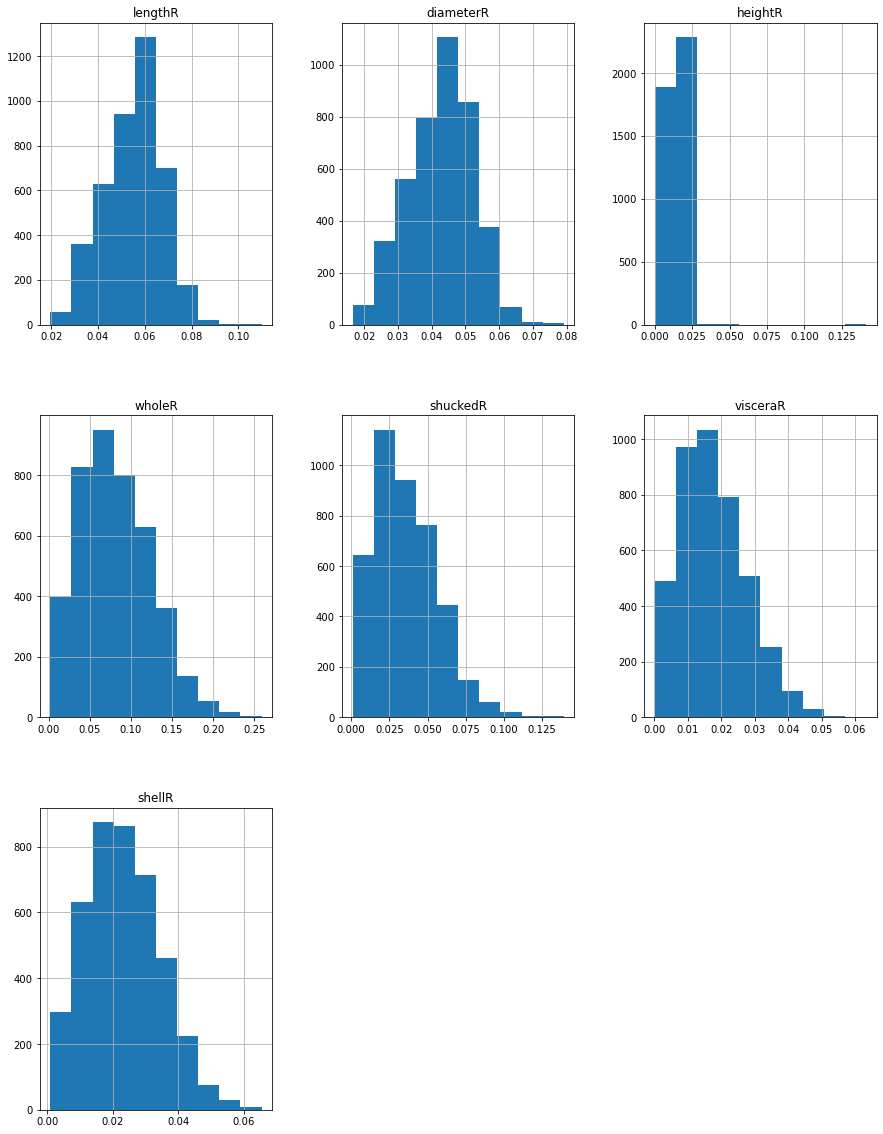

In [2514]:
ratiosDF.hist(bins = 10, figsize = (15,20))

<br>
<br>

In [2515]:
ratiosDF['rings count'] = data['Rings Count']
ratiosDF.head()

,lengthR,diameterR,heightR,wholeR,shuckedR,visceraR,shellR,rings count
0,0.030333,0.024333,0.006333,0.034267,0.014967,0.006733,0.010000,15
1,0.050000,0.037857,0.012857,0.032214,0.014214,0.006929,0.010000,7
2,0.058889,0.046667,0.015000,0.075222,0.028500,0.015722,0.023333,9
3,0.044000,0.036500,0.012500,0.051600,0.021550,0.011400,0.015500,10
4,0.047143,0.036429,0.011429,0.029286,0.012786,0.005643,0.007857,7


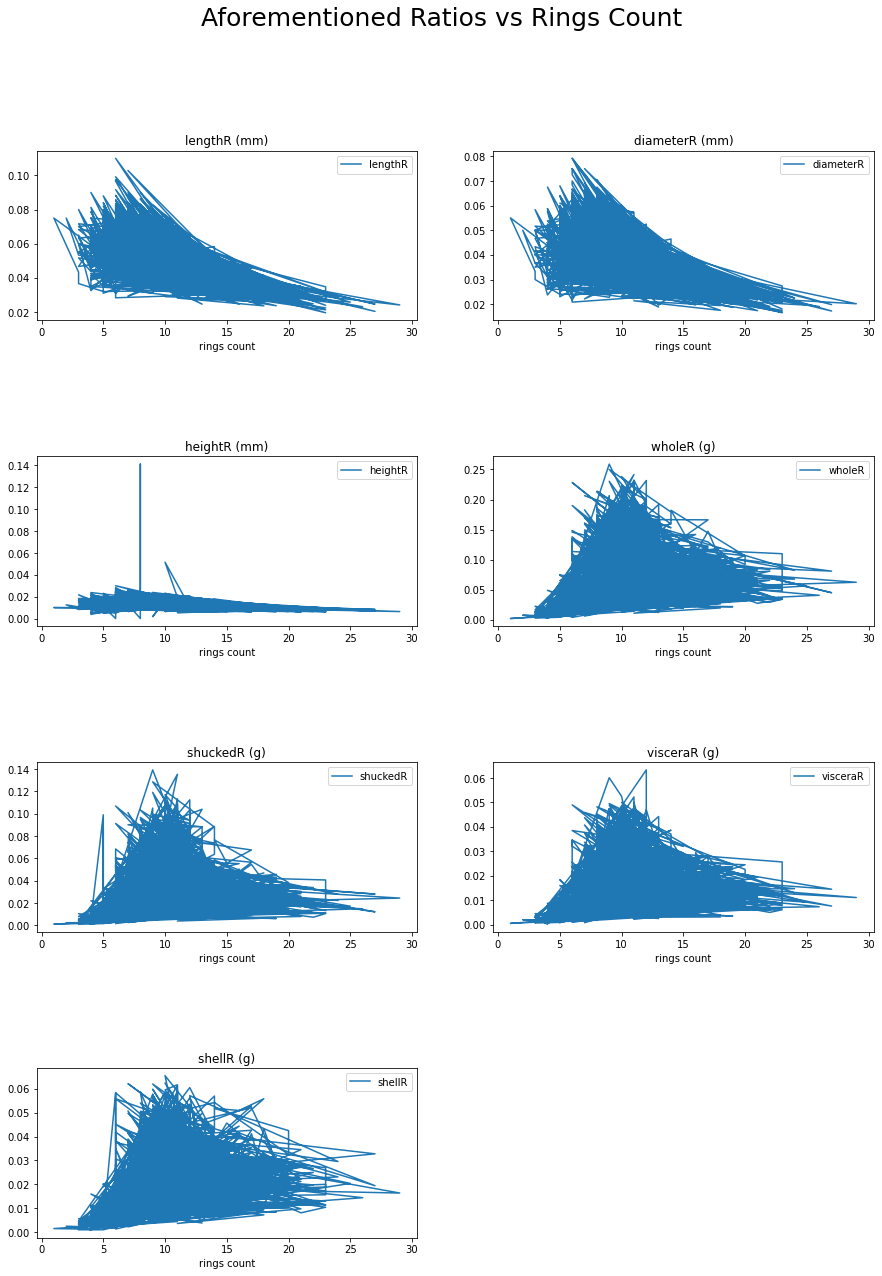

In [2516]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
fig.suptitle('Aforementioned Ratios vs Rings Count', fontsize=25)
fig.subplots_adjust(hspace=0.8)
axis[3, 1].axis('off')
ratiosDF.plot(x='rings count', y='lengthR', title='lengthR (mm)',     ax = axis[0][0])
ratiosDF.plot(x='rings count', y='diameterR', title='diameterR (mm)', ax = axis[0][1])
ratiosDF.plot(x='rings count', y='heightR', title='heightR (mm)',     ax = axis[1][0])
ratiosDF.plot(x='rings count', y='wholeR', title='wholeR (g)',        ax = axis[1][1])
ratiosDF.plot(x='rings count', y='shuckedR', title='shuckedR (g)',    ax = axis[2][0])
ratiosDF.plot(x='rings count', y='visceraR', title='visceraR (g)',    ax = axis[2][1])
ratiosDF.plot(x='rings count', y='shellR', title='shellR (g)',        ax = axis[3][0])
for i in range(4):
    print()

These plots show a plausible narrative that the growth of the organism in net measurements starts out slow, accelerates and then tails off.  The possiblility still remains for bad data, especially in the height category.  There may be sanity check problems in other columns.

&nbsp;

Let's give short hand variable names for the measurements in 'Data':

&nbsp;

In [2517]:
data.head(0)

,"Sex (M, F, and unknown)",Length of Shell-mm (longest),Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Whole-g (entire specimen),Shucked-g (meat),Viscera-g (gut after bleeding),Shell-g (dry),Rings Count


In [2518]:
length   = 'Length of Shell-mm (longest)'
diameter = 'Diameter-mm (perpendicular to longest)'
height   = 'Height-mm (shell with meat)'
whole    = 'Whole-g (entire specimen)'
shucked  = 'Shucked-g (meat)'
viscera  = 'Viscera-g (gut after bleeding)'
shell    = 'Shell-g (dry)'

In [2519]:
data.groupby('Rings Count')[[length]].max()

,Length of Shell-mm (longest)
Rings Count,
1,0.075
2,0.150
3,0.240
4,0.360
5,0.440
6,0.660
7,0.720
8,0.720
9,0.745


<AxesSubplot:title={'center':'Lengths-mm'}, xlabel='Rings Count'>

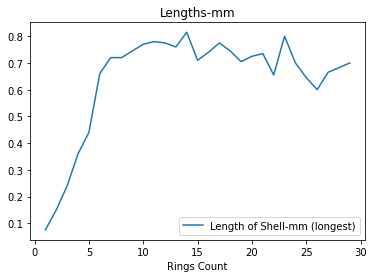

In [2520]:
data.groupby('Rings Count')[[length]].max().plot(title = 'Lengths-mm')

&nbsp;

This looks plausible with the length increasing rapidly with rings count for younger specimens and then leveling off into random static due to individual differences.  Now to plot all of the meaured columns for maximums and minimums grouped by rings count:

&nbsp;

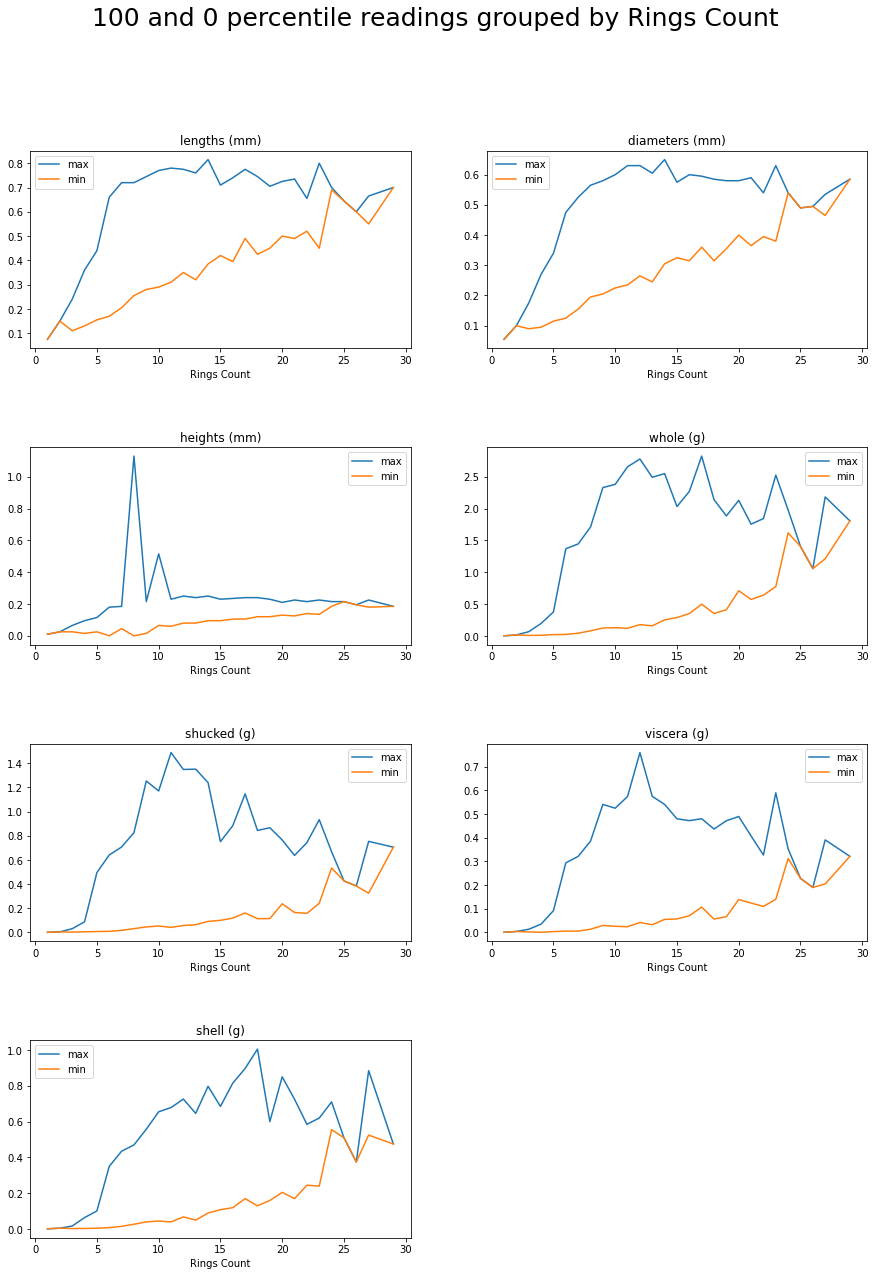

In [2521]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
fig.suptitle('100 and 0 percentile readings grouped by Rings Count', fontsize=25)
fig.subplots_adjust(hspace=0.5)
axis[3, 1].axis('off')

labels_list = ['lengths (mm)', 'diameters (mm)', 'heights (mm)', 'whole (g)', 'shucked (g)', 'viscera (g)', 'shell (g)']
iterator = 0
i = 0
j = 0
for value in data.columns:
    if iterator == 0:
        iterator = 1
        continue
    if iterator == 8:
        break
    data.rename(columns = {value:'max'}, inplace = True)
    data.groupby('Rings Count')[['max']].max().plot(title = labels_list[iterator-1], ax = axis[i][j])
    data.rename(columns = {'max':'min'}, inplace = True) 
    data.groupby('Rings Count')[['min']].min().plot(ax = axis[i][j])
    data.rename(columns = {'min':value}, inplace = True)
    
    j = iterator%2
    if j == 0:
        i +=1
    iterator += 1
for i in range(4):
    print()

&nbsp;

Text(0.5, 0, 'Rings Counts')

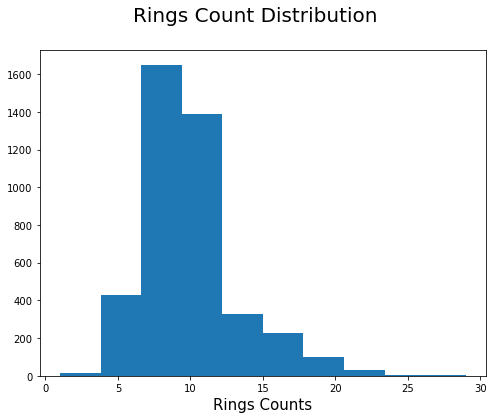

In [2522]:
fig, axis = plt.subplots(1, figsize=(8,6))
fig.suptitle('Rings Count Distribution', fontsize=20)
axis.hist(data['Rings Count'], bins =10)
axis.set_xlabel("Rings Counts", fontsize=15)

This histogram shows the sample size of the ring count declining predictably at the high end where the min and max measured values get closer together.

Now let's look at the height anomalies.

&nbsp;

In [2523]:
pd.DataFrame(data[height]).sort_values(by = height, ascending=False).head(10)

,Height-mm (shell with meat)
2051,1.130
1417,0.515
1763,0.250
1428,0.250
2179,0.250
307,0.240
1528,0.240
277,0.240
2161,0.240
3993,0.235


The top two heights are implausible.  The best way to handle this is to get the ring count for both and accordingly substitute both corresponding average heights.

In [2524]:
data.loc[data['Rings Count'] == data.iloc[[1417],:]['Rings Count'].values[0] , :][height].mean()

0.15409305993690883

In [2525]:
data.loc[data.index == 1417, height] = 0.15409305993690883

In [2526]:
data.loc[data.index == 1417, height].values[0]

0.15409305993690883

In [2527]:
data.loc[data['Rings Count'] == data.iloc[[2051],:]['Rings Count'].values[0] , :][height].mean()

0.12855633802816907

In [2528]:
data.loc[data.index == 2051, height] = 0.12855633802816907

In [2529]:
data.loc[data.index == 2051, height].values[0]

0.12855633802816907

In [2530]:
pd.DataFrame(data[height]).sort_values(by = height, ascending=False).head(10)

,Height-mm (shell with meat)
2179,0.250
1428,0.250
1763,0.250
2161,0.240
307,0.240
277,0.240
1528,0.240
2177,0.235
506,0.235
3993,0.235


&nbsp;

Redoing the plot for height:

&nbsp;

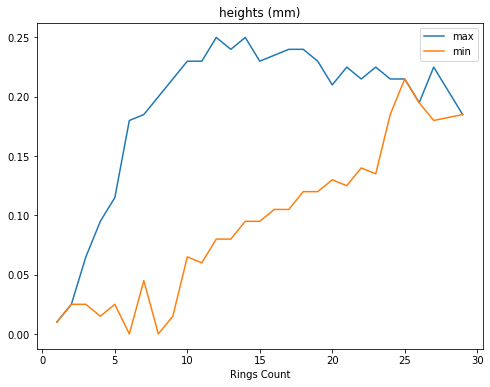

In [2531]:
fig, axis = plt.subplots(1, figsize=(8,6))
data.rename(columns = {height:'max'}, inplace = True) 
data.groupby('Rings Count')[['max']].max().plot(title = 'heights (mm)', ax = axis)
data.rename(columns = {'max':'min'}, inplace = True) 
data.groupby('Rings Count')[['min']].min().plot(ax = axis)
data.rename(columns = {'min':height}, inplace = True)

&nbsp;

Now for the plausibility checks for measurements in mm.

&nbsp;

In [2532]:
data.shape

(4177, 9)

In [2533]:
data[data[length] > data[diameter]].shape

(4176, 9)

In [2534]:
data[data[diameter] >= data[length]]

,"Sex (M, F, and unknown)",Length of Shell-mm (longest),Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Whole-g (entire specimen),Shucked-g (meat),Viscera-g (gut after bleeding),Shell-g (dry),Rings Count
1210,unknown,0.185,0.375,0.12,0.4645,0.196,0.1045,0.15,6


&nbsp;

The diameter and length appear to be inverted.  Between these two measures, we will replace the one further from the average for the ring count of that sample.

&nbsp;

In [2535]:
presumed_diameter=data.loc[data['Rings Count']==data.loc[data.index == 1210, 'Rings Count'].values[0] , :][diameter].mean()

In [2536]:
presumed_diameter/0.375

0.7436293436293439

In [2537]:
presumed_length=data.loc[data['Rings Count'] == data.loc[data.index == 1210, 'Rings Count'].values[0] , :][length].mean()

In [2538]:
presumed_length/0.185

1.996556401961808

Replacing the length:

In [2539]:
data.loc[data.index == 1210, length] = presumed_length

In [2540]:
data.loc[data.index == 1210, length].values[0]

0.3693629343629345

In [2541]:
data[data[diameter] > data[height]].shape

(4177, 9)

In [2542]:
data[data[height]==0]

,"Sex (M, F, and unknown)",Length of Shell-mm (longest),Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Whole-g (entire specimen),Shucked-g (meat),Viscera-g (gut after bleeding),Shell-g (dry),Rings Count
1257,unknown,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,unknown,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [2543]:
data[length].describe()

count    4177.000000
mean        0.524036
std         0.120002
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length of Shell-mm (longest), dtype: float64

In [2544]:
data[diameter].quantile(0.06)

0.23

Samples 1257 and 3996 have 0 height even though a small but significant percentage (6%) of all samples are smaller in diameter.  Changing the height for both:

In [2545]:
data.loc[data['Rings Count'] == 8][height].mean()

0.12679323298948625

In [2546]:
data.loc[data.index == 1257, height] = 0.12679323298948625

In [2547]:
data.loc[data.index == 1257, height].values[0]

0.12679323298948625

In [2548]:
data.loc[data['Rings Count'] == 6][height].mean()

0.09177606177606175

In [2549]:
data.loc[data.index == 3996, height] = 0.09177606177606175

In [2550]:
data.loc[data.index == 3996, height].values[0]

0.09177606177606175

In [2551]:
data[data[height]==0].shape

(0, 9)

Text(0.5, 0, 'Diameter/Height')

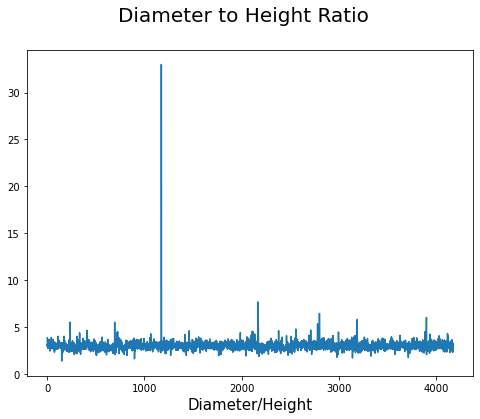

In [2552]:
fig, axis = plt.subplots(1, figsize=(8,6))
fig.suptitle('Diameter to Height Ratio', fontsize=20)
axis.plot(data[diameter]/data[height])
axis.set_xlabel("Diameter/Height", fontsize=15)

In [2553]:
(data[diameter]/data[height]).sort_values(ascending=False).head(10)

1174    33.000000
2169     7.666667
2801     6.437500
3902     6.000000
3190     5.800000
694      5.500000
236      5.500000
2782     5.333333
2172     5.000000
2558     4.769231
dtype: float64

Let's look more closely at sample 1174:

In [2554]:
data.iloc[[1174]][[diameter, height, 'Rings Count']]

,Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Rings Count
1174,0.495,0.015,9


In [2555]:
data[data['Rings Count'] == 9][height].mean()

0.14272133526850514

In [2556]:
data[data['Rings Count'] == 9][diameter].mean()

0.4252177068214804

Changing the height:

In [2557]:
data.loc[data.index == 1174, height] = 0.14272133526850514

In [2569]:
data.loc[data.index == 1174, height].values[0]

0.14272133526850514

In [2571]:
(data[diameter]/data[height]).sort_values(ascending=False).head(10)

2169    7.666667
2801    6.437500
3902    6.000000
3190    5.800000
236     5.500000
694     5.500000
2782    5.333333
2172    5.000000
2558    4.769231
2711    4.666667
dtype: float64

&nbsp;

Now to check the weights:

&nbsp;

In [2560]:
data.head(1).T

,0
"Sex (M, F, and unknown)",M
Length of Shell-mm (longest),0.455
Diameter-mm (perpendicular to longest),0.365
Height-mm (shell with meat),0.095
Whole-g (entire specimen),0.514
Shucked-g (meat),0.2245
Viscera-g (gut after bleeding),0.101
Shell-g (dry),0.15
Rings Count,15


&nbsp;

Let's compare the whole weight with the sum of the other weight measurements.

&nbsp;

In [2561]:
((data[shucked] +  data[viscera] + data[shell])/data[whole]).sort_values(ascending=False).head(20)

2627    5.170616
1216    4.644550
3996    3.257463
2641    3.140684
2127    2.062992
3086    2.009804
3814    1.503093
236     1.500000
822     1.490909
1264    1.466398
2114    1.428571
2171    1.372881
193     1.372727
1430    1.349515
3518    1.331973
1219    1.284173
2790    1.277037
2084    1.269062
43      1.250000
1302    1.248049
dtype: float64

In [2562]:
((data[shucked] +  data[viscera] + data[shell])/data[whole]).sort_values().head(20)

647     0.664093
1812    0.665421
3860    0.685305
2172    0.688312
831     0.697236
4052    0.698124
999     0.699822
1056    0.724138
270     0.724564
2240    0.729381
811     0.733723
3827    0.734081
694     0.736842
3800    0.744645
3837    0.750000
3143    0.750000
3396    0.755879
2528    0.761541
3522    0.763359
760     0.765619
dtype: float64

Text(0.5, 0, 'whole weight/sum of partial weights')

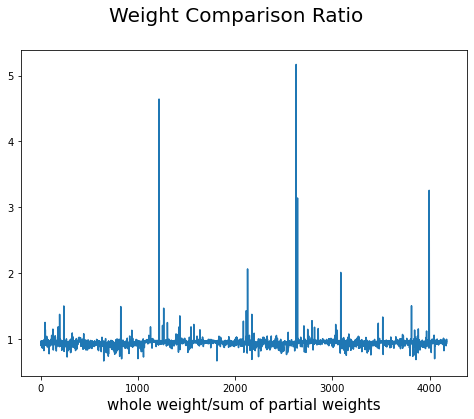

In [2563]:
fig, axis = plt.subplots(1, figsize=(8,6))
fig.suptitle('Weight Comparison Ratio', fontsize=20)
axis.plot((data[shucked] +  data[viscera] + data[shell])/data[whole])
axis.set_xlabel("whole weight/sum of partial weights", fontsize=15)

&nbsp;

How can the entire specimen be up to five times lighter than the sum of its components?  Or 25% heavier?

&nbsp;

In [2564]:
(((data[shucked] +  data[viscera] + data[shell])/data[whole]) > 1).sum()

155

In [2565]:
(((data[shucked] +  data[viscera] + data[shell])/data[whole]) < 0.80).sum()

43

In [2566]:
data.shape

(4177, 9)

&nbsp;

These problems must be related to changes in moisture content at various times during the processing of the sample.  Rather than discarding a majority of the data because of unreliable weight measurements, it would be better to consider length measurements for devising predictive models.

With this in mind, let's drop rows where the weight ratio is higher than 2.0, forming spikes in the above-shown histogram.

&nbsp;

In [2567]:
data.drop(data[(data[shucked] +  data[viscera] + data[shell])/data[whole] > 2.0].index, inplace=True)

Revisiting the histogram:

Text(0.5, 0, 'whole weight/sum of partial weights')

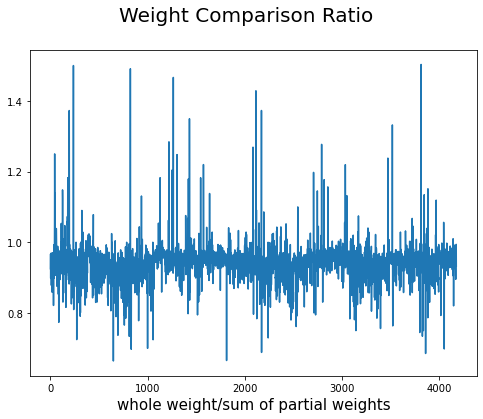

In [2568]:
fig, axis = plt.subplots(1, figsize=(8,6))
fig.suptitle('Weight Comparison Ratio', fontsize=20)
axis.plot((data[shucked] +  data[viscera] + data[shell])/data[whole])
axis.set_xlabel("whole weight/sum of partial weights", fontsize=15)